## Cleaning Resume and Job Posts Data for use by Job Recommender System 

### Datasets
* https://www.kaggle.com/maitrip/resumes; 1219 resumes; ID, category, text description
* https://www.kaggle.com/samdeeplearning/deepnlp; 125 resumes; may drop this one
* https://www.kaggle.com/madhab/jobposts/data; 19,000 job posts from 2004-2015.




Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import spacy
import string

First, start with resume dataset

In [105]:
#resume_path = '/Users/richardkuzma/coding/NLP_projects/job_recommender_project/data/resume_dataset_maitrip.csv'
# that's my home path

resume_path = '/home/ec2-user/NLP_projects/job_recommender_project/data/resume_dataset_maitrip.csv'

In [106]:
df = pd.read_csv(resume_path)
df.head()

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [107]:
#what does one resume look like
df.Resume[0]

"b'John H. Smith, P.H.R.\\n800-991-5187 | PO Box 1673 | Callahan, FL 32011 | info@greatresumesfast.com\\n\\nApproachable innovator with a passion for Human Resources.\\n\\nSENIOR HUMAN RESOURCES PROFESSIONAL\\nPersonable, analytical, flexible Senior HR Professional with multifaceted expertise. Seasoned Benefits Administrator with\\nextensive experience working with highly paid professionals in client-relationship-based settings. Dynamic team leader\\ncapable of analyzing alternatives and identifying tough choices while communicating the total value of benefit and\\ncompensation packages to senior level executives and employees.\\n\\nCORE COMPETENCIES\\nBenefits Administration \\xe2\\x80\\x93 Customer Service \\xe2\\x80\\x93 Cost Control \\xe2\\x80\\x93 Recruiting \\xe2\\x80\\x93 Acquisition Management \\xe2\\x80\\x93 Compliance Reporting\\nRetention \\xe2\\x80\\x93 Professional Services \\xe2\\x80\\x93 Domestic & International Benefits \\xe2\\x80\\x93 Collaboration \\xe2\\x80\\x93 Adap

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Text Preprocessing

https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing

In [108]:
df["resume"] = df["Resume"]
df.drop(["Resume"], axis=1, inplace=True)
df.head()

,ID,Category,resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [109]:
df.head()

,ID,Category,resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [110]:
#remove unicode
def unicodetoascii(text):

    TEXT = (text.
    		replace('\\xe2\\x80\\x99', "'").
            replace('\\xc3\\xa9', 'e').
            replace('\\xe2\\x80\\x90', '-').
            replace('\\xe2\\x80\\x91', '-').
            replace('\\xe2\\x80\\x92', '-').
            replace('\\xe2\\x80\\x93', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x98', "'").
            replace('\\xe2\\x80\\x9b', "'").
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9d', '"').
            replace('\\xe2\\x80\\x9e', '"').
            replace('\\xe2\\x80\\x9f', '"').
            replace('\\xe2\\x80\\xa6', '...').
            replace('\\xe2\\x80\\xb2', "'").
            replace('\\xe2\\x80\\xb3', "'").
            replace('\\xe2\\x80\\xb4', "'").
            replace('\\xe2\\x80\\xb5', "'").
            replace('\\xe2\\x80\\xb6', "'").
            replace('\\xe2\\x80\\xb7', "'").
            replace('\\xe2\\x81\\xba', "+").
            replace('\\xe2\\x81\\xbb', "-").
            replace('\\xe2\\x81\\xbc', "=").
            replace('\\xe2\\x81\\xbd', "(").
            replace('\\xe2\\x81\\xbe', ")").replace('\\xef\\x81\\xb3', "").replace('\\n', ' ')
             )
    return TEXT

In [111]:
#remove punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [112]:
#remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [113]:
#remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [114]:
#remove HTML
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [115]:
#remove digits
DIGITS_TO_REMOVE = "0123456789"
def remove_digits(text):
    return text.translate(str.maketrans('', '', DIGITS_TO_REMOVE))

In [116]:
#remove endlines
END_LINES = '\r\n'
def remove_endlines(text):
    """custom function to remove \r\n for end of line"""
    return text.replace(END_LINES, ' ')

In [117]:
#remove hyphens
#use this before remove_punctuation, becuase words like 'detail-oriented' get mushed
#together by remove_punctuation, which replaces '-' with ''
def remove_hyphens(text):
    """custom function to remove \r\n for end of line"""
    return text.replace('-', ' ')

In [118]:
df["resume"] = df["resume"].astype(str).str.lower()
df['resume'] = df['resume'].apply(remove_urls)
df['resume'] = df['resume'].apply(remove_html)
df['resume'] = df["resume"].apply(unicodetoascii)
df['resume'] = df['resume'].apply(remove_hyphens)
df['resume'] = df['resume'].apply(remove_endlines)
df['resume'] = df['resume'].apply(remove_punctuation)
df['resume'] = df['resume'].apply(remove_stopwords)
df['resume'] = df['resume'].apply(remove_digits)
df['resume'] = df['resume'].str.slice_replace(0,1, '') #remove the b at the beginning

In [119]:
df.head()

,ID,Category,resume
0,1,HR,bjohn h smith phr po box callahan fl info...
1,2,HR,bname surname address mobile noemail personal ...
2,3,HR,banthony brown hr assistant areas expertise pe...
3,4,HR,b id career objective pursue growth oriented c...
4,5,HR,bhuman resources director xefxxbexpert organiz...


In [124]:
df.head()

,ID,Category,resume
0,1,HR,john h smith phr po box callahan fl infog...
1,2,HR,name surname address mobile noemail personal p...
2,3,HR,anthony brown hr assistant areas expertise per...
3,4,HR,id career objective pursue growth oriented ca...
4,5,HR,human resources director xefxxbexpert organiza...


<br><br><br><br>

In [72]:
df.head()

,ID,Category,resume
0,1,HR,bjohn h smith phr po box callahan fl info...
1,2,HR,bname surname address mobile noemail personal ...
2,3,HR,banthony brown hr assistant areas expertise pe...
3,4,HR,b id career objective pursue growth oriented c...
4,5,HR,bhuman resources director xefxxbexpert organiz...


## Clean Job Posts Data

In [18]:
#jobs_path = '/Users/richardkuzma/coding/NLP_projects/job_recommender_project/data/job_posts_madhab.csv'
# that's for local

jobs_path = '/home/ec2-user/NLP_projects/job_recommender_project/data/job_posts_madhab.csv'

In [19]:
#load and take first look at job data
jobs = pd.read_csv(jobs_path)
jobs.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [20]:
#far more columns than we need
jobs.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [21]:
#drop columns. Kept Title, Description, Requirement, and Quals
#19001 rows x 5 cols
jobs.drop(['jobpost', 'date', 'AnnouncementCode', 'Term', 'Eligibility',
       'Audience', 'StartDate', 'Duration', 'Location',
       'Salary', 'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 
       'Attach', 'Year', 'Month', 'IT'], axis=1, inplace=True)

#renaming 
jobs['JobRequirement'] = jobs['JobRequirment']
jobs.drop(['JobRequirment'], axis=1, inplace=True)
jobs

,Title,Company,JobDescription,RequiredQual,JobRequirement
0,Chief Financial Officer,AMERIA Investment Consulting Company,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\r\nindivi...",- Supervises financial management and administ...
1,Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,- Bachelor's Degree; Master's is preferred;\r\...,NaN
2,Country Coordinator,Caucasus Environmental NGO Network (CENN),Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...",- Working with the Country Director to provide...
3,BCC Specialist,Manoff Group,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...",- Identify gaps in knowledge and overseeing in...
4,Software Developer,Yerevan Brandy Company,NaN,- University degree; economical background is ...,- Rendering technical assistance to Database M...
...,...,...,...,...,...
18996,Senior Creative UX/ UI Designer,Technolinguistics NGO,A tech startup of Technolinguistics based in N...,- At least 5 years of experience in Interface/...,- Work closely with product and business teams...
18997,Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,"- University degree, ideally business related;...",- Establish and manage Category Management dev...
18998,Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,"- Degree in Business, Marketing or a related f...","- Develop, establish and maintain marketing st..."
18999,Head of Online Sales Department,San Lazzaro LLC,San Lazzaro LLC is looking for a well-experien...,- At least 1 year of experience in online sale...,- Handle the project activites of the online s...


In [22]:
#drop any rows with NaN
#13124 rows x 5 cols from 19001 rows x 5 cols
jobs.dropna(inplace=True)
jobs

,Title,Company,JobDescription,RequiredQual,JobRequirement
0,Chief Financial Officer,AMERIA Investment Consulting Company,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\r\nindivi...",- Supervises financial management and administ...
2,Country Coordinator,Caucasus Environmental NGO Network (CENN),Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...",- Working with the Country Director to provide...
3,BCC Specialist,Manoff Group,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...",- Identify gaps in knowledge and overseeing in...
13,"Community Development, Capacity Building and C...",Food Security Regional Cooperation and Stabili...,Food Security Regional Cooperation and Stabili...,- Higher Education and/or professional experie...,- Assist the Tavush Marz communities and commu...
17,Country Economist (NOB),"United Nations Development Programme, Armenia",The United Nations Development Programme in Ar...,- Minimum Masters Degree in Economics;\r\n- Mi...,The incumbent under direct supervision of UNDP...
...,...,...,...,...,...
18992,.NET Developer,Macadamian AR CJSC,The incumbent will develop software applicatio...,- 2 - 5 years of experience in software develo...,- Participate in all the steps of the software...
18995,Deputy Director,"""Transport PIU"" State Institution of the RA Mi...",The incumbent will be responsible for supporti...,"- University degree in Civil Engineering, Econ...",- Support the Director in organizing the activ...
18996,Senior Creative UX/ UI Designer,Technolinguistics NGO,A tech startup of Technolinguistics based in N...,- At least 5 years of experience in Interface/...,- Work closely with product and business teams...
18999,Head of Online Sales Department,San Lazzaro LLC,San Lazzaro LLC is looking for a well-experien...,- At least 1 year of experience in online sale...,- Handle the project activites of the online s...


Descriptions, Requirements, Required Quals

In [23]:
#what does a job description look like
jobs['JobDescription'][0]

"AMERIA Investment Consulting Company is seeking a\r\nChief Financial Officer. This position manages the company's fiscal and\r\nadministrative functions, provides highly responsible and technically\r\ncomplex staff assistance to the Executive Director. The work performed\r\nrequires a high level of technical proficiency in financial management\r\nand investment management, as well as management, supervisory, and\r\nadministrative skills."

In [24]:
#what does a job requirement look like
jobs['JobRequirement'][0]

"- Supervises financial management and administrative staff, including\r\nassigning responsibilities, reviewing employees' work processes and\r\nproducts, counseling employees, giving performance evaluations, and\r\nrecommending disciplinary action;\r\n- Serves as member of management team participating in both strategic\r\nand operational planning for the company;\r\n- Directs and oversees the company's financial management activities,\r\nincluding establishing and monitoring internal controls, managing cash\r\nand investments, and managing the investment portfolio in collaboration\r\nwith the Investment team leader. This includes, but is not limited to,\r\nevaluation of investment risk, concentration risk, fund deployment\r\nlevels, adequacy of loss and liquidity reserves Assists investment team\r\nin development of proper documentation and internal systems;\r\n- Directs and oversees the annual budgeting process, including\r\ndeveloping projections for financial planning, and prepari

In [25]:
#what do the required quals look like?
jobs['RequiredQual'][0]

"To perform this job successfully, an\r\nindividual must be able to perform each essential duty satisfactorily.\r\nThe requirements listed below are representative of the knowledge,\r\nskill, and/or ability required.\r\nKnowledge of:\r\n- Generally accepted accounting principles;\r\n- Local accounting standards and legislation;\r\n- State reporting requirements pertaining to accounting;\r\n- Principles and practices of financial management and budgeting;\r\n- Principles and practices of financial systems design and analysis;\r\n- Principles and practices of contract management, records management,\r\nand risk management;\r\n- Principles and practices of management and supervision;\r\n- Principles and practices of information systems management.\r\nAbility to:\r\n- Apply sound fiscal and administrative practices to the company's\r\nactivities;\r\n- Plan, organize and supervise the work of subordinate employees,\r\nincluding training them, assigning and evaluating their work, and\r\nprov

In [26]:
#make new 'combined' column, concatenate strings from JobDescription, JobRequirement
jobs['combined'] = jobs['Title'].str.cat(jobs['JobDescription'], sep=' ').str.cat(jobs['JobRequirement'], sep=' ').str.cat(jobs['RequiredQual'], sep =' ')



In [27]:
jobs['combined'][0]

"Chief Financial Officer AMERIA Investment Consulting Company is seeking a\r\nChief Financial Officer. This position manages the company's fiscal and\r\nadministrative functions, provides highly responsible and technically\r\ncomplex staff assistance to the Executive Director. The work performed\r\nrequires a high level of technical proficiency in financial management\r\nand investment management, as well as management, supervisory, and\r\nadministrative skills. - Supervises financial management and administrative staff, including\r\nassigning responsibilities, reviewing employees' work processes and\r\nproducts, counseling employees, giving performance evaluations, and\r\nrecommending disciplinary action;\r\n- Serves as member of management team participating in both strategic\r\nand operational planning for the company;\r\n- Directs and oversees the company's financial management activities,\r\nincluding establishing and monitoring internal controls, managing cash\r\nand investments,

In [28]:
jobs["combined"] = jobs["combined"].astype(str).str.lower()
jobs['combined'] = jobs['combined'].apply(remove_urls)
jobs['combined'] = jobs['combined'].apply(remove_html)
jobs['combined'] = jobs["combined"].apply(unicodetoascii)
jobs['combined'] = jobs['combined'].apply(remove_hyphens)
jobs['combined'] = jobs['combined'].apply(remove_endlines)
jobs['combined'] = jobs['combined'].apply(remove_punctuation)
jobs['combined'] = jobs['combined'].apply(remove_stopwords)
jobs['combined'] = jobs['combined'].apply(remove_digits)

In [29]:
jobs['combined'][0]

'chief financial officer ameria investment consulting company seeking chief financial officer position manages companys fiscal administrative functions provides highly responsible technically complex staff assistance executive director work performed requires high level technical proficiency financial management investment management well management supervisory administrative skills supervises financial management administrative staff including assigning responsibilities reviewing employees work processes products counseling employees giving performance evaluations recommending disciplinary action serves member management team participating strategic operational planning company directs oversees companys financial management activities including establishing monitoring internal controls managing cash investments managing investment portfolio collaboration investment team leader includes limited evaluation investment risk concentration risk fund deployment levels adequacy loss liquidity

In [30]:
jobs['combined'][201]

'web designer web designer build flash based websites web designer responsible creating top quality web sites flash presentations interactive movies flash enabled products worldwide customers least  years experience web designer developer great skill within leading applications design tools adobe photoshop adobe illustrator corel draw macromedia dreamweaver macromedia flash html xhtml css javascript additional knowledge programming asp jsp php perl would advantage impressive portfolio previous design work please include links relevant work online old andor recent well references assist us verifying information provide enthusiastic communicative team member positive attitude dedication willingness work hard often high production pressure art design qualifications would also advantage would computer hardware audio visual infrastructure networking fair knowledge english high standard mathematics ability learn new internet authoring technologies relevant web site development'

In [31]:
jobs['combined'][2003]

'tour manager looking dedicated active enthusiastic communicable person work organization involved tourism manage tour related organizational logistics matters find ahead time interests schedules tourists organize tours take care tourists hotel reservations food arrangements minimum  years work experience preferably tourism related field higher education excellent knowledge english armenian russian languages knowledge foreign languages plus good computer skills good abilities work team experience working foreigners'

In [32]:
jobs

,Title,Company,JobDescription,RequiredQual,JobRequirement,combined
0,Chief Financial Officer,AMERIA Investment Consulting Company,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\r\nindivi...",- Supervises financial management and administ...,chief financial officer ameria investment cons...
2,Country Coordinator,Caucasus Environmental NGO Network (CENN),Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...",- Working with the Country Director to provide...,country coordinator public outreach strengthen...
3,BCC Specialist,Manoff Group,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...",- Identify gaps in knowledge and overseeing in...,bcc specialist lead local enhancement developm...
13,"Community Development, Capacity Building and C...",Food Security Regional Cooperation and Stabili...,Food Security Regional Cooperation and Stabili...,- Higher Education and/or professional experie...,- Assist the Tavush Marz communities and commu...,community development capacity building confli...
17,Country Economist (NOB),"United Nations Development Programme, Armenia",The United Nations Development Programme in Ar...,- Minimum Masters Degree in Economics;\r\n- Mi...,The incumbent under direct supervision of UNDP...,country economist nob united nations developme...
...,...,...,...,...,...,...
18992,.NET Developer,Macadamian AR CJSC,The incumbent will develop software applicatio...,- 2 - 5 years of experience in software develo...,- Participate in all the steps of the software...,net developer incumbent develop software appli...
18995,Deputy Director,"""Transport PIU"" State Institution of the RA Mi...",The incumbent will be responsible for supporti...,"- University degree in Civil Engineering, Econ...",- Support the Director in organizing the activ...,deputy director incumbent responsible supporti...
18996,Senior Creative UX/ UI Designer,Technolinguistics NGO,A tech startup of Technolinguistics based in N...,- At least 5 years of experience in Interface/...,- Work closely with product and business teams...,senior creative ux ui designer tech startup te...
18999,Head of Online Sales Department,San Lazzaro LLC,San Lazzaro LLC is looking for a well-experien...,- At least 1 year of experience in online sale...,- Handle the project activites of the online s...,head online sales department san lazzaro llc l...


<br>
<br>
<br>
<br>
<br>

## Train/Test Split

(array([1770., 2099., 2053., 2330., 2420., 2452.]),
 array([    0.        ,  3166.66666667,  6333.33333333,  9500.        ,
        12666.66666667, 15833.33333333, 19000.        ]),
 <a list of 6 Patch objects>)

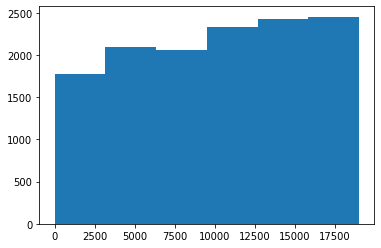

In [33]:
indices = np.asarray(list(jobs.index.values))
indices
plt.hist(indices, bins=6)

In [34]:
# reindex jobs 0-13123
jobs.set_index(np.arange(13124), inplace=True)

# RESTART USING THESE

In [35]:
# test dataset is last 2000 entries of 
jobs_test = jobs['combined'].tail(2000).to_frame()

In [36]:
# train dataset is first 11124 postings, change series to df
jobs_train = jobs['combined'][:11124].to_frame()

## gensim try



In [37]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk import word_tokenize

In [38]:
for i in jobs_test['combined']:
    jobs_test['label'] = jobs_test['combined'].index
for i in jobs_train['combined']:
    jobs_train['label'] = jobs_train['combined'].index


In [43]:
# see labels applied
jobs_train.head()

,combined,label
0,chief financial officer ameria investment cons...,0
1,country coordinator public outreach strengthen...,1
2,bcc specialist lead local enhancement developm...,2
3,community development capacity building confli...,3
4,country economist nob united nations developme...,4


In [39]:
# TaggedDocumentIterator class takes pandas text and label Series and yields TaggedDocuments
class TaggedDocumentIterator(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield TaggedDocument(words=doc.split(), tags=[self.labels_list[idx]])
 
docLabels = list(jobs_train['label'])
data = list(jobs_train['combined'])
sentences = TaggedDocumentIterator(data, docLabels)

In [45]:
# train Doc2Vec model

model = Doc2Vec(vector_size=100, window=10, min_count=5, workers=11,alpha=0.025, epochs=20)
model.build_vocab(sentences)
model.train(sentences,total_examples=model.corpus_count, epochs=model.iter)

/home/ec2-user/new2env/lib64/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# Store the model to map-able files
model.save('/tmp/model_job_train_docsimilarity.doc2vec')
# Load the model
model = Doc2Vec.load('/tmp/model_job_train_docsimilarity.doc2vec')

need to change this (below) to match my use case. <br>
credit: https://praveenbezawada.com/2018/01/25/document-similarity-using-gensim-dec2vec/

In [74]:

def general_test_predict():
    #Select a random int from 0 to length of training set
    rand_int = np.random.randint(0, jobs_test.shape[0])
    print ('Random int {}'.format(rand_int))
    print ('Random int + 11124 = {}'.format(rand_int+11124))
    pick_text = jobs_test.iloc[rand_int]['combined']
    print('Text is: {}'.format(pick_text))
    pick_label = jobs_test.iloc[rand_int, jobs_test.columns.get_loc('label')] #we could grab label, but this works for non-indexed labels
    print('label is: {}'.format(pick_label))

    ####I didn't do his cleaning because I did my own. Need cleaning maybe on other stuff?
    #Clean the document using the utility functions used in train phase
    #test_sample = default_clean(test_sample)
    #test_sample = stop_and_stem(test_sample, stem=False)
 
    #Convert the sample document into a list and use the infer_vector method to get a vector representation for it
    pick_words = pick_text.split()
    pick_vec = model.infer_vector(pick_words, steps=50, alpha=0.25)
    #print('split words is: {}'.format(pick_words))
    #print('vector is: {}'.format(pick_vec))
 
    #use the most_similar utility to find the most similar documents.
    similars = model.docvecs.most_similar(positive=[pick_vec])
 
    print('\n~~~~~similars are~~~~~:')
    for i in similars:
        print('i[0]: ', i[0], ' i[1]: ', i[1])
        print(jobs_train.iloc[i[0]]['combined'],  '\n')

general_test_predict()

Random int 1452
Random int + 11124 = 12576
Text is: electrician electrician performs duties general direction utility supervisor works independently perform maintenance repair modification plants electrical systems involved fabrication application installation repair electrical electromechanical equipment installation electrical conduit ensure proper functioning electrical units facility repair electrical equipment install properly maintain electrical equipment machines wiring facility fix electrical wiring outlets existing equipments break replace faulty part use appropriately handle electrical testing university degree electrical electronics engineering work experience relevant field proficiency electrical installations conduit wiring practices computer literacy basic knowledge ms excel word
label is: 12576

~~~~~similars are~~~~~:
i[0]:  11030  i[1]:  0.6557842493057251
electrician electrician perform duties general direction utility supervisor work independently perform maintenance

In [162]:
# def resume_test_predict(pick_a_resume_number):
def resume_test_predict():
    print("There are {} resumes\n".format(df.shape[0]))
    
    # Select a random int from 0 to length of resume set
    rand_int = np.random.randint(1, df.shape[0]+1)
    # selection = pick_a_resume_number
    selection = rand_int
    print ('selected resume is ID #{}\n'.format(selection))
    
    # pick the resume text and ID associated with the random int
    pick_text = df.iloc[selection -1 ]['resume']
    pick_label = df.iloc[selection -1, df.columns.get_loc('ID')] #we could grab ID, but this works for non-indexed labels too
    print('Resume ID is: {}'.format(pick_label))
    print('Resume text: {}'.format(pick_text))
    
    ####I didn't do his cleaning because I did my own. Need cleaning maybe on other stuff?
    #Clean the document using the utility functions used in train phase
    #test_sample = default_clean(test_sample)
    #test_sample = stop_and_stem(test_sample, stem=False)
 
    #Convert the sample document into a list and use the infer_vector method to get a vector representation for it
    pick_words = pick_text.split()
    pick_vec = model.infer_vector(pick_words, steps=50, alpha=0.25)
    #print('split words is: {}'.format(pick_words))
    #print('vector is: {}'.format(pick_vec))
 
    #use the most_similar utility to find the most similar documents.
    similars = model.docvecs.most_similar(positive=[pick_vec])
 
    print('\n\n\t\tSimilar job descriptions to this resume:')
    
    count = 1
    for i in similars:
        print('\nSimilar job number: {}'.format(count))
        count += 1
        print('Job ID ', i[0], ' Similarity Score: ', i[1])
        
        # pulls combined text from jobs_train 
        #print(jobs_train.iloc[i[0]]['combined'],  '\n')

        # pulls job title and description from jobs.txt
        print('Job title: {}'.format(jobs.iloc[i[0]]['Title']))
        print('Company: {}'.format(jobs.iloc[i[0]]['Company']))
        print('Description: {}'.format(jobs.iloc[i[0]]['JobDescription']))
        
        


In [165]:
resume_test_predict()

There are 1219 resumes

selected resume is ID #878

Resume ID is: 878
Resume text: sample resume mechanical engineer fresh graduate benjamin smith  street boise idaho  contactanymailcom    career objective seeking role mechanical engineer fresher would given opportunity utilize theoretical skills sense responsibility efficiency help organization grow education bs mechanical engineering idaho university   gpa skills xefxxbknowledge production planning control processes xefxxbskilled use computer programs master cam cad xefxxbcapability implement budgeting techniques xefxxbhigh levels communication xefxxbability work team technical skills xcxefxxbcomputer programs autocad ms project solidworks ms excel matlab xefxxbwelding tools machining mills lathes cncs angle grinders oxy acetylene arc welders plasma cutters bandsaws drill presses grinders chop saws etc professional experience micron technology inc boise idaho  student intern xefxxbdesigned obtained company approval major hydrogen sto